# レポート2(提出期限5/25)

**必ず名前と学籍番号を書くこと**

名前：

学籍番号：

## 2.1 線形回帰(10点)

seaborn組み込みのダイアモンドの価格データをつかって重回帰分析を行い、
適切だと思う説明変数の組み合わせをもとめなさい

In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

# データの取得・確認
diamond = sns.load_dataset('diamonds')
diamond

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [2]:
diamond.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [3]:
diamond.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


分離してみる

訓練データとテストデータに分割してみます。(**第9回講義P7、ホールドアウトと交差検証**)

In [4]:
from sklearn.model_selection import train_test_split
x = diamond.drop("price",axis=1)
y = diamond.pop("price")

x_train, x_test , y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 1)

とりあえず全部のパラメータをいれてみる。

In [5]:
df_train = pd.concat([x_train, y_train], axis = 1)

In [6]:
#　回帰の実施

import statsmodels.formula.api as smf
model = smf.glm('price ~ carat + color + clarity +depth+table+cut+x+y+z', df_train) 
fit = model.fit()                                
fit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Results: Generalized linear model
==========================================================================
Model:                 GLM               AIC:             729737.5906     
Link Function:         identity          BIC:             55761532202.6060
Dependent Variable:    price             Log-Likelihood:  -3.6484e+05     
Date:                  2023-05-27 10:39  LL-Null:         -6.1044e+05     
No. Observations:      43152             Deviance:        5.5762e+10      
Df Model:              23                Pearson chi2:    5.58e+10        
Df Residuals:          43128             Scale:           1.2929e+06      
Method:                IRLS                                               
--------------------------------------------------------------------------
                   Coef.    Std.Err.    z     P>|z|    [0.025     0.975]  
--------------------------------------------------------------------------
Intercept         8039.3772 433.4326  18.5482 0.0000  7189.8648  8888.8895
color[T.E]        -223.4052  20.1161 -11.1058 0.0000  -262.8320  -183.9783
color[T.F]        -282.9233  20.3688 -13.8900 0.0000  -322.8455  -243.0011
color[T.G]        -492.1973  19.9387 -24.6856 0.0000  -531.2763  -453.1183
color[T.H]        -988.0699  21.2226 -46.5574 0.0000 -1029.6655  -946.4743
color[T.I]       -1465.8882  23.7800 -61.6439 0.0000 -1512.4961 -1419.2804
color[T.J]       -2371.6690  29.4191 -80.6168 0.0000 -2429.3293 -2314.0087
clarity[T.VVS1]   -351.9432  36.6364  -9.6064 0.0000  -423.7492  -280.1373
clarity[T.VVS2]   -426.5601  35.0363 -12.1748 0.0000  -495.2300  -357.8902
clarity[T.VS1]    -783.8550  33.4686 -23.4206 0.0000  -849.4522  -718.2578
clarity[T.VS2]   -1104.1529  32.6782 -33.7886 0.0000 -1168.2010 -1040.1047
clarity[T.SI1]   -1707.7349  32.9348 -51.8520 0.0000 -1772.2859 -1643.1839
clarity[T.SI2]   -2655.2723  34.2359 -77.5582 0.0000 -2722.3734 -2588.1712
clarity[T.I1]    -5455.7226  57.9553 -94.1368 0.0000 -5569.3128 -5342.1323
cut[T.Premium]     -70.3491  16.4068  -4.2878 0.0000  -102.5059   -38.1923
cut[T.Very Good]   -98.5277  16.0132  -6.1529 0.0000  -129.9130   -67.1425
cut[T.Good]       -255.7226  22.7516 -11.2398 0.0000  -300.3150  -211.1303
cut[T.Fair]       -851.0372  37.8432 -22.4885 0.0000  -925.2085  -776.8660
carat            11165.1575  54.0158 206.7017 0.0000 11059.2885 11271.0266
depth              -61.4432   5.0075 -12.2701 0.0000   -71.2578   -51.6286
table              -25.1122   3.2705  -7.6783 0.0000   -31.5223   -18.7021
x                 -976.1594  34.8988 -27.9712 0.0000 -1044.5597  -907.7590
y                    1.7770  19.5308   0.0910 0.9275   -36.5026    40.0567
z                  -32.1680  34.8269  -0.9237 0.3557  -100.4275    36.0916
==========================================================================

"""

cut,color,clarityはカテゴリ変数として認識してくれている鵜です。

p値から y,zを外します

In [7]:
model = smf.glm('price ~ carat + color + clarity +depth+table+cut+x', df_train) 
fit = model.fit()                                
fit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Results: Generalized linear model
==========================================================================
Model:                 GLM               AIC:             729734.4451     
Link Function:         identity          BIC:             55762636419.4462
Dependent Variable:    price             Log-Likelihood:  -3.6485e+05     
Date:                  2023-05-27 10:39  LL-Null:         -6.1045e+05     
No. Observations:      43152             Deviance:        5.5763e+10      
Df Model:              21                Pearson chi2:    5.58e+10        
Df Residuals:          43130             Scale:           1.2929e+06      
Method:                IRLS                                               
--------------------------------------------------------------------------
                   Coef.    Std.Err.    z     P>|z|    [0.025     0.975]  
--------------------------------------------------------------------------
Intercept         8150.6046 415.8742  19.5987 0.0000  7335.5061  8965.7031
color[T.E]        -223.5207  20.1154 -11.1119 0.0000  -262.9461  -184.0953
color[T.F]        -282.9116  20.3685 -13.8896 0.0000  -322.8332  -242.9901
color[T.G]        -492.1413  19.9383 -24.6832 0.0000  -531.2196  -453.0629
color[T.H]        -988.0063  21.2222 -46.5554 0.0000 -1029.6010  -946.4116
color[T.I]       -1465.8400  23.7796 -61.6429 0.0000 -1512.4470 -1419.2329
color[T.J]       -2371.7377  29.4186 -80.6205 0.0000 -2429.3970 -2314.0784
clarity[T.VVS1]   -351.8876  36.6357  -9.6051 0.0000  -423.6921  -280.0830
clarity[T.VVS2]   -426.4658  35.0356 -12.1723 0.0000  -495.1344  -357.7973
clarity[T.VS1]    -783.9208  33.4681 -23.4230 0.0000  -849.5170  -718.3246
clarity[T.VS2]   -1104.0498  32.6773 -33.7864 0.0000 -1168.0961 -1040.0034
clarity[T.SI1]   -1707.5664  32.9336 -51.8487 0.0000 -1772.1151 -1643.0176
clarity[T.SI2]   -2655.0729  34.2346 -77.5553 0.0000 -2722.1715 -2587.9744
clarity[T.I1]    -5454.8966  57.9428 -94.1427 0.0000 -5568.4625 -5341.3308
cut[T.Premium]     -70.0615  16.3920  -4.2741 0.0000  -102.1892   -37.9338
cut[T.Very Good]   -98.8767  16.0021  -6.1790 0.0000  -130.2403   -67.5132
cut[T.Good]       -255.7171  22.7497 -11.2405 0.0000  -300.3057  -211.1285
cut[T.Fair]       -851.1804  37.8312 -22.4995 0.0000  -925.3281  -777.0327
carat            11164.9182  53.9842 206.8182 0.0000 11059.1111 11270.7253
depth              -63.2971   4.5829 -13.8117 0.0000   -72.2793   -54.3148
table              -25.0726   3.2696  -7.6684 0.0000   -31.4809   -18.6643
x                 -994.0603  22.8366 -43.5293 0.0000 -1038.8192  -949.3015
==========================================================================

"""

AICが小さくなるうな説明変数を探します、ステップワイズ法みたいに、要素を１つづつ削ります。(**第8回講義P13、ステップワイズ法**)

In [8]:
xs = ['carat', 'color', 'clarity','depth','table','cut','x']

ここで、便利関数

In [9]:
def calc_aic(lst):
    for key in lst:
        xs_copy=lst.copy()
        xs_copy.remove(key)
        model = smf.glm('price ~ '+'+'.join(xs_copy), df_train) 
        fit = model.fit()
        print('AIC={},formula={}'.format(fit.aic,'+'.join(xs_copy)))

In [10]:
calc_aic(xs)

AIC=759464.5615788092,formula=color+clarity+depth+table+cut+x
AIC=739124.0398538797,formula=carat+clarity+depth+table+cut+x
AIC=747595.7729574967,formula=carat+color+depth+table+cut+x
AIC=729922.8839783934,formula=carat+color+clarity+table+cut+x
AIC=729791.2390501727,formula=carat+color+clarity+depth+cut+x
AIC=730275.3880864399,formula=carat+color+clarity+depth+table+x
AIC=731587.7513980217,formula=carat+color+clarity+depth+table+cut


'table'がいらない用です

In [11]:
calc_aic( ['carat','color', 'clarity','depth','cut','x'])

AIC=759463.5152687448,formula=color+clarity+depth+cut+x
AIC=739175.6919793173,formula=carat+clarity+depth+cut+x
AIC=747689.1881092564,formula=carat+color+depth+cut+x
AIC=729926.3653823793,formula=carat+color+clarity+cut+x
AIC=730666.8688610541,formula=carat+color+clarity+depth+x
AIC=731637.1063562046,formula=carat+color+clarity+depth+cut


あまり改善されませんでした

In [12]:
#carat+color+clarity+depth+cut

model = smf.glm('price ~ carat+color+clarity+depth+cut+x', df_train) 
fit = model.fit()
fit.aic   

729791.2390501727

次に、テストデータで決定係数R2をつかって評価します（**第７回講義P27**、決定係数)

決定係数$R^2$(coefficient of determination):
$$ R^2 = 1 - \frac{\sum_{i=1}^{n}( y_i - \hat{y_i})^2}{\sum_{i=1}^{n}(y_i - \overline{y})^2} $$

In [13]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np
# predicting the accuracy score
y_prediction = fit.predict(x_test)
score=r2_score(y_test,y_prediction)
print('r2 socre is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is  0.9215967831681159
mean_sqrd_error is== 1218269.326271646
root_mean_squared error of is== 1103.7523844919413


r2スコアで変数選択してみます。

In [14]:
def calc_r2score(lst):
    for key in lst:
        xs_copy=lst.copy()
        xs_copy.remove(key)
        model = smf.glm('price ~ '+'+'.join(xs_copy), df_train) 
        fit = model.fit()
        y_prediction = fit.predict(x_test)
        score=r2_score(y_test,y_prediction)
        print('R2Score={},formula={}'.format(score,'+'.join(xs_copy)))

In [15]:
calc_r2score(xs)

R2Score=0.8429110306186297,formula=color+clarity+depth+table+cut+x
R2Score=0.900840680932674,formula=carat+clarity+depth+table+cut+x
R2Score=0.8794878070822025,formula=carat+color+depth+table+cut+x
R2Score=0.9212248639256573,formula=carat+color+clarity+table+cut+x
R2Score=0.9215967831681159,formula=carat+color+clarity+depth+cut+x
R2Score=0.920881808787841,formula=carat+color+clarity+depth+table+x
R2Score=0.917296489128459,formula=carat+color+clarity+depth+table+cut


やっぱりtableがいらないようです。

In [16]:
calc_r2score( ['carat','color', 'clarity','depth','cut','x'])

R2Score=0.8429130197736148,formula=color+clarity+depth+cut+x
R2Score=0.9006086196920713,formula=carat+clarity+depth+cut+x
R2Score=0.8791381199155256,formula=carat+color+depth+cut+x
R2Score=0.9212075746763461,formula=carat+color+clarity+cut+x
R2Score=0.9199038753084148,formula=carat+color+clarity+depth+x
R2Score=0.9171563055491287,formula=carat+color+clarity+depth+cut


In [17]:
model = smf.glm('price ~ carat+color+clarity+depth+cut+x', df_train) 
fit = model.fit()

訓練データをプロット

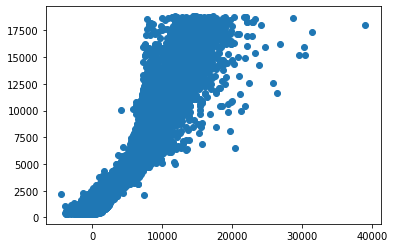

In [18]:
y_pred = fit.predict(x_train)
plt.scatter(y_pred,y_train)

テストデータで性能を評価

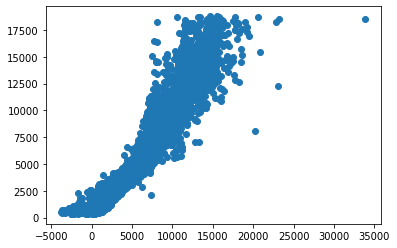

In [19]:
y_pred = fit.predict(x_test)
plt.scatter(y_pred,y_test)

In [20]:
#予測とデータのお比較
#diamond['predict'] = fit.predict() #予測を行い，結果を'predict'列に追加
#diamond.plot.scatter(x='predict',y='price'); #描画

## 1.2 ロジスティック回帰(10点)

seabornの組み込みデータtitnaicを用いて、生存者をロジスティック回帰を実施しなさい

In [21]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

# データの取得・確認
dataset = sns.load_dataset('titanic')
dataset

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


前処理は以下を用い、データセットはdataset1を利用してもよい。独自に前処理を行ってもよい

In [23]:
# 重複しているカラムと影響の少ない変数の削除
df = ["sibsp","parch","fare","embarked","class","who","adult_male","deck","embark_town","alive","alone"]
dataset1 = dataset.drop(df,axis = 1)
dataset1.head()

# 欠損値の確認
dataset1.isnull().sum()

# 欠損値に平均を補完し性別をダミー変数に変更（男性:1,女性:0）
dataset1["age"] = dataset1["age"].fillna(dataset1["age"].mean())
dataset1["sex"] = dataset1["sex"].map({"male":1, "female":0})
dataset1.isnull().sum()


survived    0
pclass      0
sex         0
age         0
dtype: int64

In [24]:
dataset1

,survived,pclass,sex,age
0,0,3,1,22.000000
1,1,1,0,38.000000
2,1,3,0,26.000000
3,1,1,0,35.000000
4,0,3,1,35.000000
...,...,...,...,...
886,0,2,1,27.000000
887,1,1,0,19.000000
888,0,3,0,29.699118
889,1,1,1,26.000000


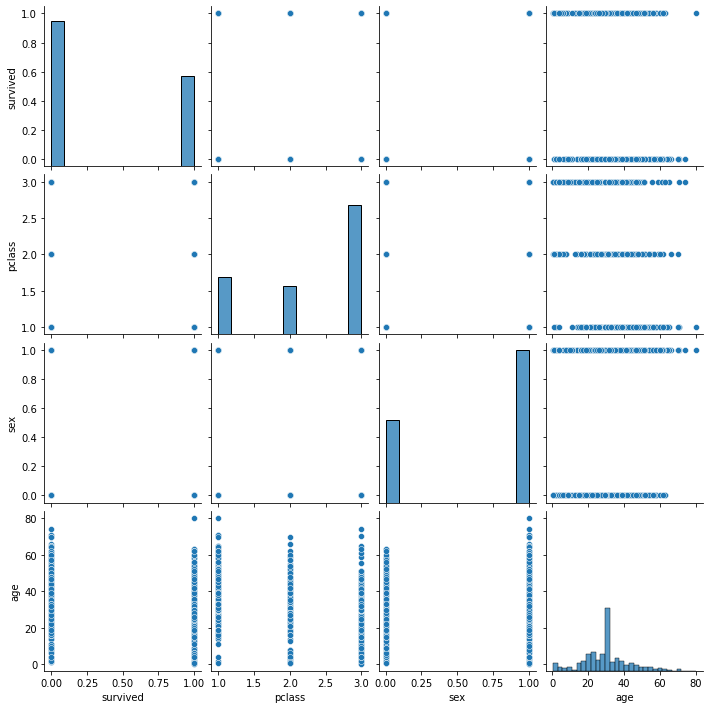

In [25]:
sns.pairplot(dataset1)

トレーニング用とテスト用に分割します

In [26]:
x = dataset1.drop("survived",axis=1)
y = dataset1.pop("survived")
x_train, x_test , y_train, y_test = train_test_split(x,y,test_size = 0.1, random_state = 1)

In [27]:
df_train = pd.concat([x_train, y_train], axis = 1)

In [28]:
#　回帰の実施

import statsmodels.api as sm
model = smf.glm(formula="survived ~ sex + pclass + age", data=df_train, family= sm.families.Binomial() )
res = model.fit() #学習
print(res.summary2())

               Results: Generalized linear model
Model:              GLM              AIC:            725.5214  
Link Function:      Logit            BIC:            -4611.1098
Dependent Variable: survived         Log-Likelihood: -358.76   
Date:               2023-05-27 10:46 LL-Null:        -532.22   
No. Observations:   801              Deviance:       717.52    
Df Model:           3                Pearson chi2:   833.      
Df Residuals:       797              Scale:          1.0000    
Method:             IRLS                                       
----------------------------------------------------------------
            Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
----------------------------------------------------------------
Intercept   4.6158    0.4707    9.8063  0.0000   3.6932   5.5383
sex        -2.6580    0.1971  -13.4828  0.0000  -3.0444  -2.2716
pclass     -1.1312    0.1247   -9.0697  0.0000  -1.3756  -0.8867
age        -0.0317    0.0077   -4.1195  0.0000  -

In [ ]:
#　回帰の実施

AIC=725.5213590420332, r2 socre =0.3424991983525264 


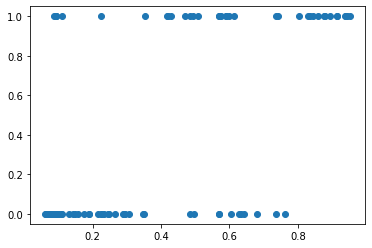

In [29]:
#dataset1['predict'] = fit.predict() #予測を行い，結果を'predict'列に追加
#dataset1.plot.scatter(x='predict',y='survived'); #描画

y_pred = res.predict(x_test)
plt.scatter(y_pred,y_test)
score=r2_score(y_test,y_pred)
print('AIC={}, r2 socre ={} '.format(res.aic,score))

そうえいば、plcassもsexもカテゴリー変数だったので、カテゴリ変数であることを明示的にformulaに記入。(**第8回講義P14、カテゴリー変数の取り扱い**)

In [30]:
model = smf.glm(formula="survived ~ C(sex) + C(pclass) + age", data=df_train, family= sm.families.Binomial() )
res = model.fit() #学習
print(res.summary2())

               Results: Generalized linear model
Model:              GLM              AIC:            727.2351  
Link Function:      Logit            BIC:            -4604.7102
Dependent Variable: survived         Log-Likelihood: -358.62   
Date:               2023-05-27 10:47 LL-Null:        -532.22   
No. Observations:   801              Deviance:       717.24    
Df Model:           4                Pearson chi2:   836.      
Df Residuals:       796              Scale:          1.0000    
Method:             IRLS                                       
---------------------------------------------------------------
                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------
Intercept       3.4344   0.3813   9.0065 0.0000  2.6870  4.1818
C(sex)[T.1]    -2.6560   0.1974 -13.4551 0.0000 -3.0429 -2.2691
C(pclass)[T.2] -1.0010   0.2726  -3.6717 0.0002 -1.5354 -0.4667
C(pclass)[T.3] -2.2417   0.2523  -8.8866 0.0000 -2.7362

ちょっとAICが上がったかな。

r2 socre is  0.33916069345226996
AIC=727.2351378619173, r2 socre =0.33916069345226996 


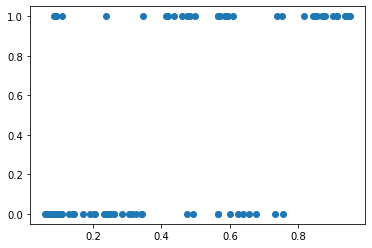

In [31]:
y_pred = res.predict(x_test)
plt.scatter(y_pred,y_test)
score=r2_score(y_test,y_pred)
print('r2 socre is ',score)
print('AIC={}, r2 socre ={} '.format(res.aic,score))

ageと性別(sex)で傾向をみている

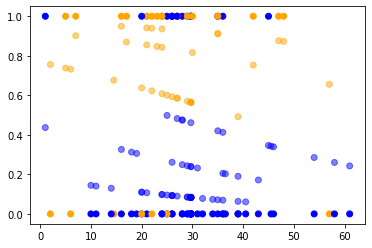

In [32]:
def get_color(sex):
    if(sex==0):
        return 'orange'
    return 'blue'
colors=[get_color(f) for f in x_test['sex']]
plt.scatter(x_test['age'],y_test,c=colors)#
plt.scatter(x_test['age'],y_pred,c=colors,alpha=0.5)

なんとなく、女性(sex=0)で若いほうが生存率が高いのか、、男女差もありそうだな。

(array([30.,  5., 11.,  4.,  8.,  8.,  6.,  4.,  4., 10.]),
 array([0.06090085, 0.14975016, 0.23859947, 0.32744878, 0.41629808,
        0.50514739, 0.5939967 , 0.682846  , 0.77169531, 0.86054462,
        0.94939393]),
 <BarContainer object of 10 artists>)

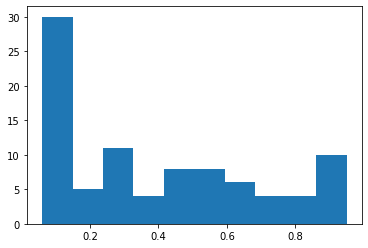

In [33]:
plt.hist(y_pred)

(array([53.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 37.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

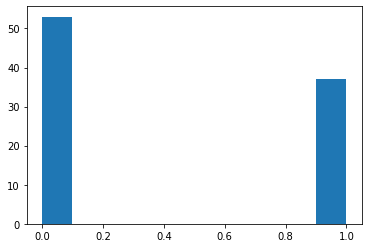

In [34]:
plt.hist(y_test)

In [35]:
res.params

Intercept         3.434414
C(sex)[T.1]      -2.655988
C(pclass)[T.2]   -1.001023
C(pclass)[T.3]   -2.241737
age              -0.031416
dtype: float64

seabornの lmplotを使うと、ロジスティック回帰をした上に、可視化まで一度にやってくれる模様(**第5回講義P25、Implotによる可視化**)

ここでは男女別で、年齢による生存率をロジスティック回帰をやってみた

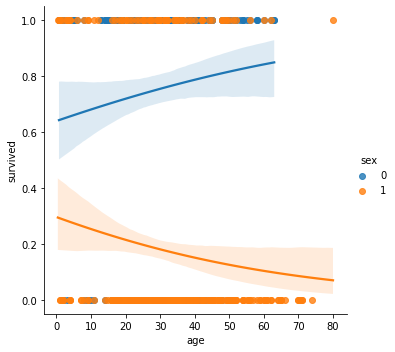

In [36]:
sns.lmplot(x="age", y="survived", hue='sex',data=df_train, logistic=True)

男性(sex=1)と女性(sex=0)では傾向が違うことがわかる。。。

## 2.3 クラスタリング(10点)
- くずし字のデータを取得して、クラス分類や、クラスタリングを行います。
- TSNEで学習したデータに対してクラスタリングを行うことをします。

In [37]:
!pip install japanize-matplotlib

You should consider upgrading via the 'c:\python38\python.exe -m pip install --upgrade pip' command.


まずはデータを取得します。

In [43]:
!wget http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-train-imgs.npz -O kmnist-train-imgs.npz
!wget http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-train-labels.npz -O kmnist-train-labels.npz
!wget http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-test-imgs.npz -O kmnist-test-imgs.npz
!wget http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-test-labels.npz -O kmnist-test-labels.npz
!wget http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist_classmap.csv

'wget' �́A�����R�}���h�܂��͊O���R�}���h�A
����\�ȃv���O�����܂��̓o�b�` �t�@�C���Ƃ��ĔF������Ă��܂���B
'wget' �́A�����R�}���h�܂��͊O���R�}���h�A
����\�ȃv���O�����܂��̓o�b�` �t�@�C���Ƃ��ĔF������Ă��܂���B
'wget' �́A�����R�}���h�܂��͊O���R�}���h�A
����\�ȃv���O�����܂��̓o�b�` �t�@�C���Ƃ��ĔF������Ă��܂���B
'wget' �́A�����R�}���h�܂��͊O���R�}���h�A
����\�ȃv���O�����܂��̓o�b�` �t�@�C���Ƃ��ĔF������Ă��܂���B
'wget' �́A�����R�}���h�܂��͊O���R�}���h�A
����\�ȃv���O�����܂��̓o�b�` �t�@�C���Ƃ��ĔF������Ă��܂���B


正解ラベル(0,...9)に対応するひらがなを得ます。最初がindex=1から始まるのに注意です。

In [42]:
import numpy as np
names = np.loadtxt('kmnist_classmap.csv', dtype='str')
names

FileNotFoundError: kmnist_classmap.csv not found.

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

#最初の5000だけ
train_images = np.load('kmnist-train-imgs.npz')['arr_0'][:5000]
train_labels = np.load('kmnist-train-labels.npz')['arr_0'][:5000]
test_images = np.load('kmnist-test-imgs.npz')['arr_0'][:5000]
test_labels = np.load('kmnist-test-labels.npz')['arr_0'][:5000]

FileNotFoundError: [Errno 2] No such file or directory: 'kmnist-train-imgs.npz'

train_imagesにどういうデータがあるかを確認します。

<Figure size 640x480 with 0 Axes>

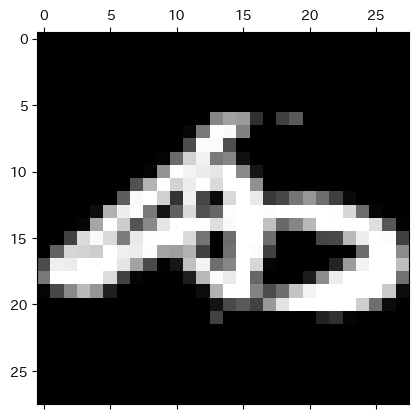

In [9]:
plt.gray()
plt.matshow(train_images[1])

In [10]:
train_data=train_images.reshape(-1, 784)
test_data=test_images.reshape(-1, 784)
train_data[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [11]:
train_images[1].shape

(28, 28)

In [12]:
train_data[1].shape

(784,)

In [13]:
train_images.shape

(5000, 28, 28)

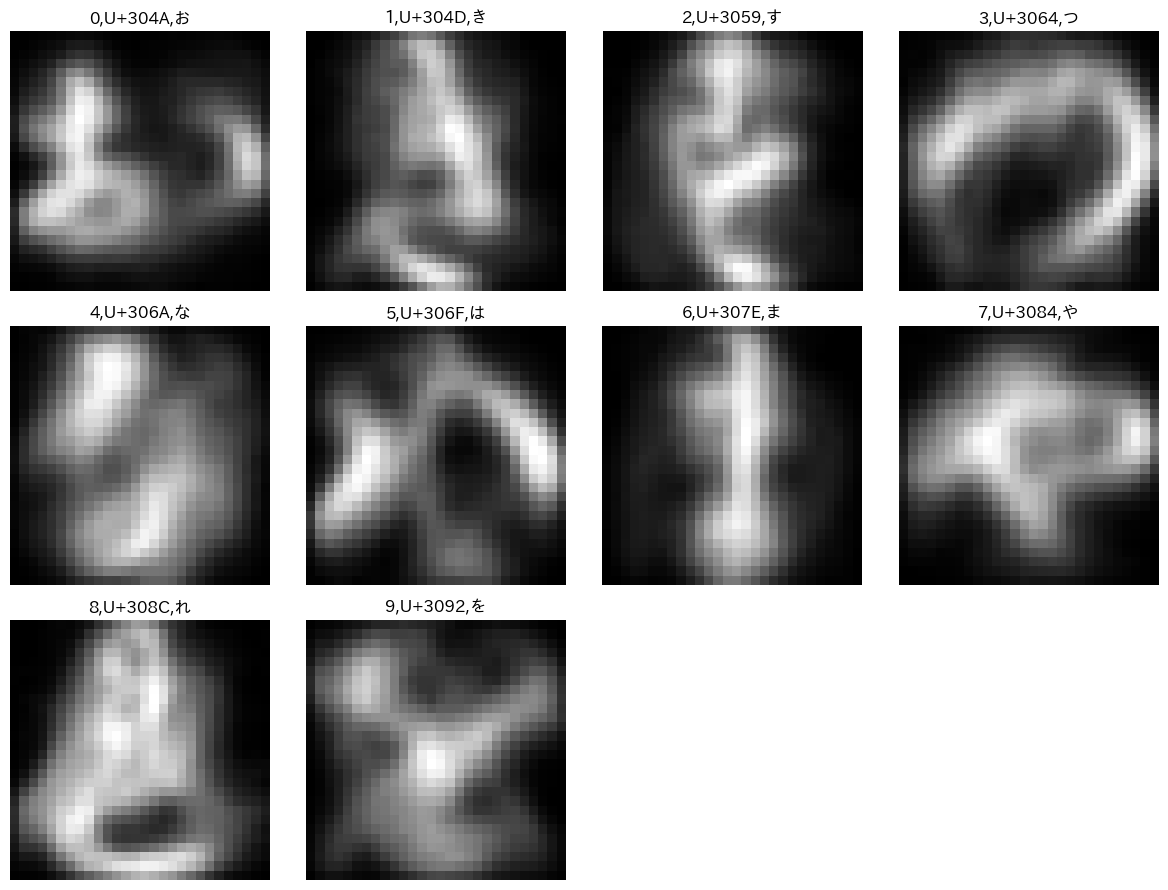

In [14]:
# とりあえず平均をとってみます。

plt.figure(figsize=(12, 9))
for label in range(10):
    plt.subplot(3, 4, label + 1)
    indices = np.where(train_labels == label)
    mean_image = train_images[indices].mean(axis=0)
    plt.imshow(mean_image, cmap='gray')
    plt.title(names[label+1])
    plt.axis('off')
plt.tight_layout()

In [15]:
import sklearn.neighbors
import sklearn.ensemble
import sklearn.metrics

clf_knn = sklearn.neighbors.KNeighborsClassifier(
    n_neighbors=4, weights='distance', n_jobs=7)
clf_knn.fit(train_data, train_labels)
y_pred = clf_knn.predict(test_data)

print(sklearn.metrics.accuracy_score(test_labels, y_pred))
print(sklearn.metrics.classification_report(test_labels, y_pred))
print(sklearn.metrics.confusion_matrix(test_labels, y_pred))

0.8174
              precision    recall  f1-score   support

           0       0.95      0.74      0.83       516
           1       0.87      0.86      0.87       530
           2       0.75      0.80      0.78       495
           3       0.87      0.91      0.89       492
           4       0.88      0.76      0.81       513
           5       0.74      0.85      0.79       485
           6       0.71      0.89      0.79       506
           7       0.92      0.74      0.82       491
           8       0.72      0.87      0.79       504
           9       0.90      0.77      0.83       468

    accuracy                           0.82      5000
   macro avg       0.83      0.82      0.82      5000
weighted avg       0.83      0.82      0.82      5000

[[380   0   1   2   2  70   3  18  39   1]
 [  0 457  12   0   3   3  36   0  14   5]
 [  5   5 398  20   1   8  27   4  16  11]
 [  0   2  13 448   0  12  13   0   4   0]
 [  9  13  13  11 388  18  25   2  26   8]
 [  1   3  33   8  

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

projected = pca.fit_transform(train_data)
print(projected.shape)

(5000, 2)


<ipython-input-17-0ae22cc6564c>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('tab10', 10))


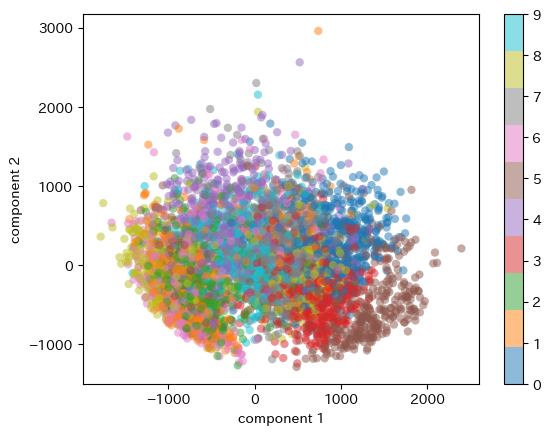

In [17]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=train_labels, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('tab10', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

PCAの結果はイマイチ、、

そこでTSNEの実施

In [ ]:
from sklearn.manifold import TSNE
import sklearn.datasets
import seaborn as sns
import pandas as pd

digits2d = TSNE(n_components=2).fit_transform(train_data)

plt.scatter(digits2d[:,0], digits2d[:,1], edgecolors='k')

### 課題1：ここからが問題です。

In [ ]:
## K平均法をつかってクラスタリングして結果を表示せよ
from sklearn.cluster import KMeans
%matplotlib inline
from matplotlib import cm

#KMeanをつかう、lecture10_clustering.ipynb　を参考

#クラスタリングした結果を表示するための色付けのための予測
#y_train_est = kmeans.predict(digits2d)

#描画はこのようになるはず。
plt.scatter(digits2d[:,0], digits2d[:,1], c=y_train_est, cmap=cm.bwr, edgecolors='k')

# クラスタリングの結果と正解値を比較せよ